In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt

from sklearn import model_selection
import numpy as np

from sklearn.linear_model import LogisticRegression

In [58]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25)

def get_error(pred, y):
    return np.sum((pred != y).astype(int)) / len(y)

#Рекоммендуемая реализация LogLoss
def log_loss(pred, y): return -np.sum(y*np.log(pred)+(1-y)*np.log(1-pred))/len(y)

In [59]:
def adaboost(X, y, N):

    # Размер выборки
    n_objects = len(X)

    # Запишем количество классов в переменную
    n_classes = len(np.unique((y)))

    # Начальные веса деревьев
    w = np.ones(n_objects) / n_objects

    # Деревья с весами будем записывать в список
    models = []

    for n in range(N):
        # Зададим дерево и обучим его
        clf = LogisticRegression()
        clf.fit(X, y, w)

        predictions = clf.predict(X)
        e = log_loss(clf.predict_proba(X)[:, 1], y)
        # Запишем условие в общем виде (применимо к небинарным классификаторам)
        if e >= 1 - 1/n_classes: 
            break

        # Вычислим вес для дерева
        alpha = 0.5 * np.log((1 - e) / e)

        # Найдем индексы правильно классифицированных элементов
        match = predictions == y

        # Увеличим веса для неправильно классифицированных элементов
        w[~match] *= np.exp(alpha)

        # Нормализуем веса
        w /= w.sum()

        # Добавим дерево с весом в список
        models.append((alpha, clf))
    
    return models

In [60]:
N = 100

import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    models = adaboost(X_train, y_train, N)

In [61]:
def predict(X, models):
    
    n_classes = 2
    n_objects = len(X)
    
    # вначале обозначим предсказание нулевым массивом
    y_pred = np.zeros((n_objects, n_classes))
    
    for alpha, clf in models:
        prediction = clf.predict(X)
        # Для каждого предсказания будем прибавлять alpha к
        # элементу с индексом предсказанного класса
        y_pred[range(n_objects), prediction] += alpha
    
    # выберем индексы с максимальными суммарными весами -
    # получим предсказанные алгоритмом классы
    y_pred = np.argmax(y_pred, axis=1)
    
    return y_pred

print(f'Точность алгоритма на обучающей выборке: {(1 - get_error(predict(X_train, models), y_train)) * 100:.3f}')

Точность алгоритма на обучающей выборке: 93.897


In [62]:
print(f'Точность алгоритма на тестовой выборке: {(1 - get_error(predict(X_test, models), y_test)) * 100:.3f}')

Точность алгоритма на тестовой выборке: 91.608


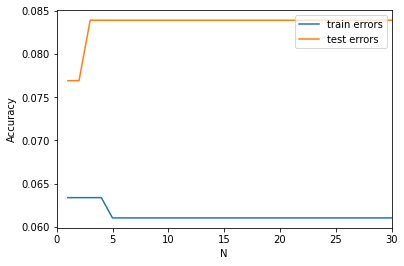

In [63]:
import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    train_errors = []
    test_errors = []

    for n in range(1, 31):
        mods = adaboost(X_train, y_train, n)
        train_errors.append(get_error(predict(X_train, mods), y_train))
        test_errors.append(get_error(predict(X_test, mods), y_test))
    x = list(range(1, 31))

    plt.xlim(0, 30)
    plt.plot(x, train_errors, label='train errors')
    plt.plot(x, test_errors, label='test errors')
    plt.xlabel('N')
    plt.ylabel('Accuracy')
    plt.legend(loc='upper right')

# 2

In [64]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25)

def get_error(pred, y):
    return np.sum((pred != y).astype(int)) / len(y)

#Рекоммендуемая реализация LogLoss
def log_loss(pred, y): return -np.sum(y*np.log(pred)+(1-y)*np.log(1-pred))/len(y)

In [65]:
def adaboost(X, y, N):

    # Размер выборки
    n_objects = len(X)

    # Запишем количество классов в переменную
    n_classes = len(np.unique((y)))

    # Начальные веса деревьев
    w = np.ones(n_objects) / n_objects

    # Деревья с весами будем записывать в список
    models = []

    for n in range(N):
        # Зададим дерево и обучим его
        clf = LogisticRegression()
        clf.fit(X, y, w)

        predictions = clf.predict(X)
        e = log_loss(predictions, y)
        # Запишем условие в общем виде (применимо к небинарным классификаторам)
        if e >= 1 - 1/n_classes: 
            break

        # Вычислим вес для дерева
        alpha = 0.5 * np.log((1 - e) / e)

        # Найдем индексы правильно классифицированных элементов
        match = predictions == y

        # Увеличим веса для неправильно классифицированных элементов
        w[~match] *= np.exp(alpha)

        # Нормализуем веса
        w /= w.sum()

        # Добавим дерево с весом в список
        models.append((alpha, clf))
    
    return models

In [66]:
N = 100

import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    models = adaboost(X_train, y_train, N)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [67]:
def predict(X, models):
    
    n_classes = 2
    n_objects = len(X)
    
    # вначале обозначим предсказание нулевым массивом
    y_pred = np.zeros((n_objects, n_classes))
    
    for alpha, clf in models:
        prediction = clf.predict(X)
        # Для каждого предсказания будем прибавлять alpha к
        # элементу с индексом предсказанного класса
        y_pred[range(n_objects), prediction] += alpha
    
    # выберем индексы с максимальными суммарными весами -
    # получим предсказанные алгоритмом классы
    y_pred = np.argmax(y_pred, axis=1)
    
    return y_pred

print(f'Точность алгоритма на обучающей выборке: {(1 - get_error(predict(X_train, models), y_train)) * 100:.3f}')

Точность алгоритма на обучающей выборке: 94.836


In [68]:
print(f'Точность алгоритма на тестовой выборке: {(1 - get_error(predict(X_test, models), y_test)) * 100:.3f}')

Точность алгоритма на тестовой выборке: 88.811


In [69]:
import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    train_errors = []
    test_errors = []

    for n in range(1, 31):
        mods = adaboost(X_train, y_train, n)
        train_errors.append(get_error(predict(X_train, mods), y_train))
        test_errors.append(get_error(predict(X_test, mods), y_test))
    x = list(range(1, 31))

    plt.xlim(0, 30)
    plt.plot(x, train_errors, label='train errors')
    plt.plot(x, test_errors, label='test errors')
    plt.xlabel('N')
    plt.ylabel('Accuracy')
    plt.legend(loc='upper right')

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').